In [1]:
import pandas as pd 
import matplotlib. pyplot as plt 
import seaborn as sns
from matplotlib import style 
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, f1_score



In [3]:
df = pd.read_csv("C:\Adv seminar\graduation thesis\data\depress twitter Korean\depress_twitter_Korean.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   1000 non-null   object
 1   label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [11]:
def data_preprocessing (text):
    if isinstance(text, float):
        text=''

    text = text.lower()
    text = re.sub(r"(http\s+|www\S+http\S+)", "",text,flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub("user",'',text)
    text = re.sub("url",'',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [12]:
df.text = df["tweet"].apply(data_preprocessing)
df.head()

C:\Users\xingr\AppData\Local\Temp\ipykernel_25368\1806502255.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.text = df["tweet"].apply(data_preprocessing)


,tweet,label
0,별이야!!!!!! https://t.co/0ayXZJeew1,0
1,아아아아아ㅏ아아ㅏ\n피곤한데 오랜만에 틧터하면서 밤 샐래\n같이 하실 분? 없으면 ...,1
2,바둑아!!\n개자쓱아 경인선 갔으면 화끈하게~마~\n백신 마자쁘라\n쪽팔리게스루 뭔...,1
3,"외롭다,,,누가 나한테 고백 좀 해주시와요\n#트친소 #게친소 #게이들 https:...",1
4,갑자기업노말재탕중 역시마음의고향이에 https://t.co/5pvwPLEnaN,0


<Axes: xlabel='label', ylabel='count'>

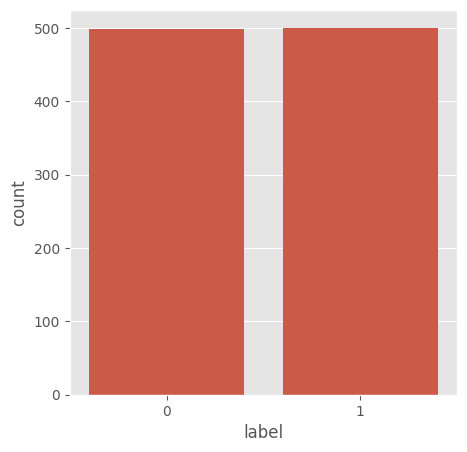

In [6]:

df.text = df["tweet"].apply(data_preprocessing)
df = df.drop_duplicates('tweet')
df['label'].value_counts()
fig = plt.figure(figsize=(5,5))
sns.countplot(x = 'label', data=df)

In [7]:
vect = TfidfVectorizer(ngram_range = (1,2)).fit(df['tweet'])
feature_names = vect.get_feature_names_out()
print('Number of features :{}\n'.format(len(feature_names)))
print('First 20 features: \n{}'.format(feature_names[:20]))

Number of features :19840

First 20 features: 
['04' '04 17' '05일까지' '05일까지 2018년도' '0ayxzjeew1' '0fp4ycw4ko'
 '0k9nixf4ub' '0lrwxxaeiy' '0nxpiurmis' '0qugrplevq' '0vitsyitcc'
 '0w8gw4glu7' '0xn4hlcnbo' '0zcdjwjgcn' '0명' '0명 되는날' '10' '10 졸음' '100'
 '100 https']


In [8]:
X = df['tweet']
Y = df['label']
X = vect.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.2, random_state= 42)

x_train = x_train[y_train.notna()]
y_train = y_train.dropna()

x_test = x_test[y_test.notna()]
y_test = y_test.dropna()

print(f'size of x_train {x_train.shape}')
print(f'size of y_train {y_train.shape}')
print(f'size of x_test {x_test.shape}')
print(f'size of y_test {y_test.shape}')

size of x_train (799, 19840)
size of y_train (799,)
size of x_test (200, 19840)
size of y_test (200,)


In [9]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict,y_test)
print('Test accuarcy : {:.2f}%'.format(logreg_acc*100))
print(round(f1_score(y_test, logreg_predict,pos_label=1.0),2))

Test accuarcy : 63.00%
0.69


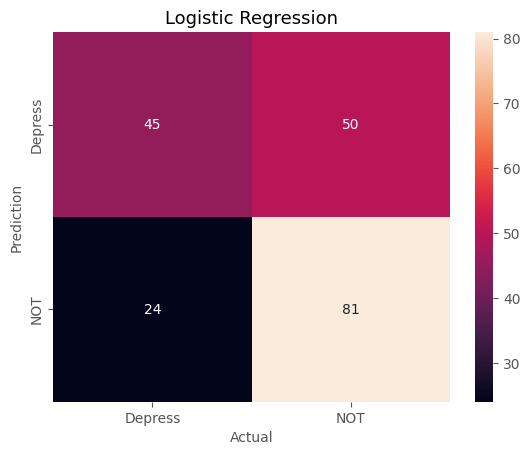

In [10]:
cm = confusion_matrix(y_test,logreg_predict)
sns.heatmap(cm,
            annot= True,
            fmt='g',
            xticklabels=['Depress','NOT'],
            yticklabels=['Depress','NOT'])
plt.ylabel('Prediction', fontsize = 10)
plt.xlabel('Actual',fontsize = 10)
plt.title("Logistic Regression", fontsize = 13)
plt.show()
